# LASED Example Notebook

This is a notebook to demonstrate how to use LASED. LASED stands for Laser-Atom interaction Simulator using quantum ElectroDynamics. An atomic level system is built, laser parameters are defined, and a the laser-atomic system dynamics are simulated. 

In [1]:
%run "base-LASED/LASED/time_evolution.py"
%run "base-LASED/LASED/rotation.py"

import plotly.graph_objects as go

## Setting up the system

To set up a Laser-Atom system you must first declare the atomic states which you want to work with and label them.

Then, you must put the states into either the ground or excited states which the laser couples to.

Then, all other laser parameters must be input.

In [9]:
# System parameters
n = 8  # number of energy levels in system

# Create states
one = State(L = 2, S = 0, m = -2, w = 0, label = 1)
two = State(L = 2, S = 0, m = -1, w = 0, label = 2)
three = State(L = 2, S = 0, m = 0, w = 0, label = 3)
four = State(L = 2, S = 0, m = 1, w = 0, label = 4)
five = State(L = 2, S = 0, m = 2, w = 0, label = 5)
six = State(L = 1, S = 0, m = -1, w = 0, label = 6)
seven = State(L = 1, S = 0, m = 0, w = 0, label = 7)
eight = State(L = 1, S = 0, m = 1, w = 0, label = 8)

G = [one, two, three, four, five] # ground states
E = [six, seven, eight] # excited states
Q = [1, -1] # laser radiation polarisation]
Q_decay = [1, 0, -1] # Decay channel polarisations
tau = 24.39 # lifetime in ns/rad (take from NIST 1/A_ki as this is in rad/s)
tau_f = 1e3 # non-radiative lifetime of rydberg upper state to other states in ns/rad

laser_power = 100 # laser intensity in mW
r_sigma = 0.75  # radial distance to 2D standard deviation in mm
n_intensity = 3
laser_wavelength = 452.821e-9 # wavelength of laser

# Doppler detuning parameters
doppler_width = 0.1*2*PI # doppler width in Grad/s
delta_upper = 3*doppler_width
delta_lower = -3*doppler_width
doppler_steps = 3
doppler_detunings = np.linspace(delta_lower, delta_upper, doppler_steps)
atomic_velocity = 0  # Velocity component of atoms in direction of laser beam

# Simulation parameters
start_time = 0
stop_time = 250 # in ns
time_steps = 250
time = np.linspace(start_time, stop_time, time_steps)

rho0 = np.zeros((n*n, 1), dtype = complex)

# Initialise ground states 1, 3, and 5 as equally populated
row = index(one, one, n)
rho0[row, 0] = 1/3
row = index(three, three, n)
rho0[row, 0] = 1/3
row = index(five, five, n)
rho0[row, 0] = 1/3

# Set up the output data structure
rho_output = [ [0 for j in range(len(time))] for i in range(n*n)]

# print("Initial condition density matrix rho(t = 0): ")
# print(rho0)

In [7]:
# timeEvolutionGaussianAndDopplerAveraging(n, E, G, Q, Q_decay, tau, laser_power, r_sigma, n_intensity, 
#                 laser_wavelength, doppler_width, doppler_detunings, time, rho0, rho_output, tau_f = tau_f)
timeEvolutionDopplerAveraging(n, E, G, Q, Q_decay, tau, laser_power, laser_wavelength, 
                              doppler_width, doppler_detunings, time, rho0, rho_output, 
                              tau_f = tau_f)

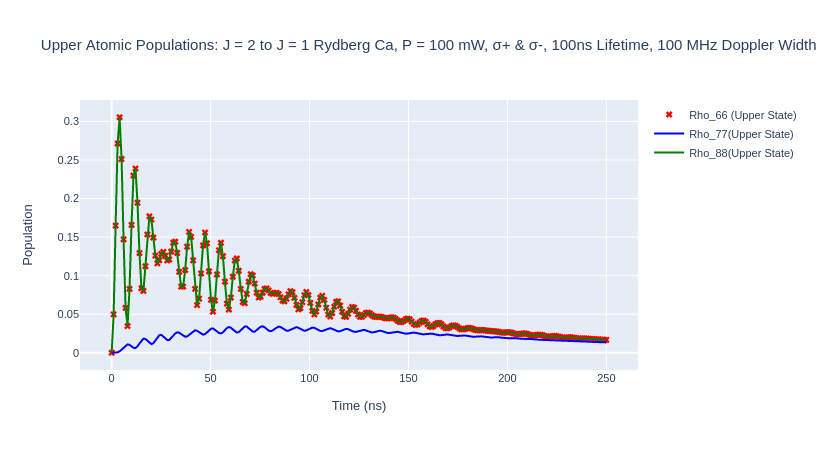

In [8]:
fig_upper = go.Figure(data = go.Scatter(x = time,
                                 y = rho_output[index(six, six, n)],
                                 mode = 'markers',
                                    name = "Rho_66 (Upper State)",
                                    marker = dict(
                                color = 'red',
                                symbol = 'x',
                            )))

fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_output[index(seven, seven, n)],
                                 mode = 'lines',
                                    name = "Rho_77(Upper State)",
                                    marker = dict(
                                color = 'blue',
                                symbol = 'square',
                           )))
fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_output[index(eight, eight, n)],
                                 mode = 'lines',
                                    name = "Rho_88(Upper State)",
                                    marker = dict(
                                color = 'green',
                                symbol = 'circle',
                           )))

fig_upper.update_layout(title = "Upper Atomic Populations: J = 2 to J = 1 Rydberg Ca, P = 100 mW, σ+ & σ-, 100ns Lifetime, 100 MHz Doppler Width",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_upper.show()